In [1]:
import pandas as pd
df_wine = pd.read_csv('wine.data', header=None)
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3,
stratify=y,
random_state=0)
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
import numpy as np
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [17]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
        S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % ( S_W.shape[0], S_W.shape[1]))
S_W

Within-class scatter matrix: 13x13


array([[ 1.2308e+03,  7.3314e+01, -2.2016e+02, -7.8647e+01, -9.5900e+01,
         5.4327e+01,  3.0728e+01, -4.9382e+01, -1.8054e+02,  3.5625e+02,
         2.1789e+02, -7.5889e+01,  5.6271e+01],
       [ 7.3314e+01,  2.0931e+03,  1.5783e+02,  3.2410e+02, -1.6465e+02,
         1.0002e+02,  7.9315e+01,  1.1678e+02,  3.2787e+02, -2.0497e+02,
        -6.1630e+02,  8.1290e+01, -1.9229e+02],
       [-2.2016e+02,  1.5783e+02,  2.6659e+03,  1.6805e+03,  3.6079e+02,
         1.3983e+02,  2.3968e+02,  4.0033e+02, -1.8732e+02, -1.0074e+02,
         9.7057e+01,  2.3431e+02,  3.2301e+01],
       [-7.8647e+01,  3.2410e+02,  1.6805e+03,  2.1068e+03,  2.8036e+02,
         1.3082e+01,  9.1883e+01,  2.9135e+02, -1.7355e+02, -1.5507e+02,
         1.1646e+02,  1.8287e+02, -6.7313e+01],
       [-9.5900e+01, -1.6465e+02,  3.6079e+02,  2.8036e+02,  2.3448e+03,
         1.2934e+02, -2.6243e+00, -4.2851e+02,  4.0185e+02,  6.7735e+01,
         2.4980e+02,  4.0485e+01,  2.8717e+02],
       [ 5.4327e+01,  1.0002e+

In [16]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % ( S_W.shape[0], S_W.shape[1]))
S_W

Within-class scatter matrix: 13x13


array([[ 240.3638,  101.5279,  105.1087,   81.4811,   15.7607,   91.6249,
          21.2572,  -13.2001,  110.2355,  136.1319,  -14.9817,   56.785 ,
          -5.9016],
       [ 101.5279,  619.6098,   85.7466,   78.834 ,    8.2213,  -14.0186,
         -19.0601,   29.3961,  -52.0365,  -92.3282,   35.5281,   26.4005,
          18.9685],
       [ 105.1087,   85.7466,  264.2262,  201.0069,   52.3428,   74.4059,
          22.0331,  -70.0219,   35.4531,   44.3965,   27.5411,   39.2279,
         -16.9777],
       [  81.4811,   78.834 ,  201.0069,  251.669 ,   71.8043,   41.0102,
          29.9982,  -95.6294,   44.1232,   36.9073,   -1.8546,   25.6444,
         -14.7848],
       [  15.7607,    8.2213,   52.3428,   71.8043,  231.4804,  -22.4392,
          49.4811, -180.5349,   30.0714,   14.4008,  -27.8551,  -10.6506,
          17.047 ],
       [  91.6249,  -14.0186,   74.4059,   41.0102,  -22.4392,  155.2196,
          11.2324,  103.3493,  130.4992,   73.6268,   20.304 ,   46.3635,
           0

In [15]:
print('Class label distribution: %s'
... % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [18]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [19]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % ( S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [20]:
eigen_vals, eigen_vecs =np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [21]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.76152218979388
2.7769182556456118e-14
2.7769182556456118e-14
2.6824555522660597e-14
2.6824555522660597e-14
2.4500945973492232e-14
2.4500945973492232e-14
1.5920052288882915e-14
4.583608739776299e-15
4.583608739776299e-15
1.0144564083105273e-15
0.0


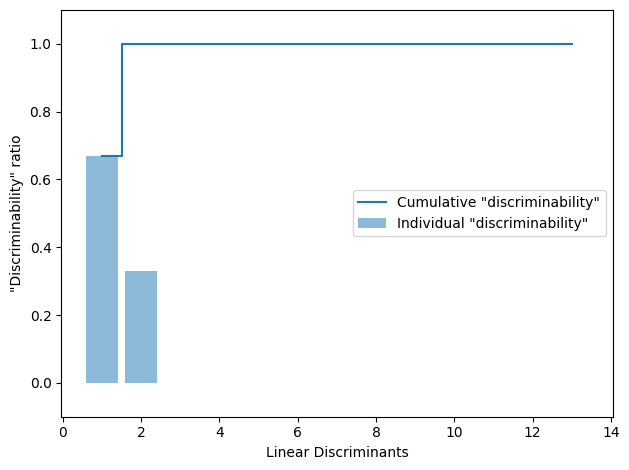

In [23]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


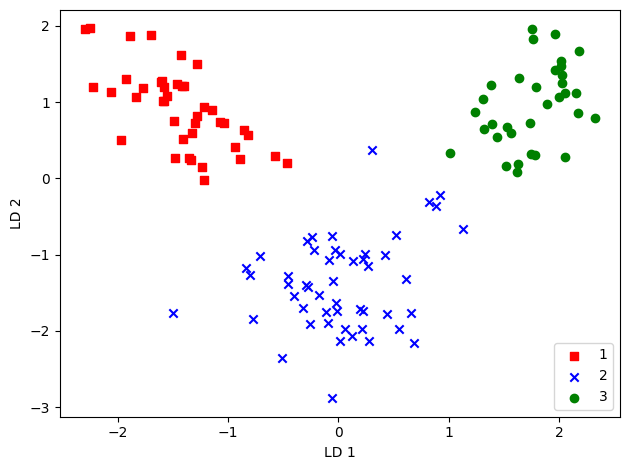

In [29]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1] * (-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [45]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

In [38]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

C:\Users\Shabnam\AppData\Local\Temp\ipykernel_14716\3615212090.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


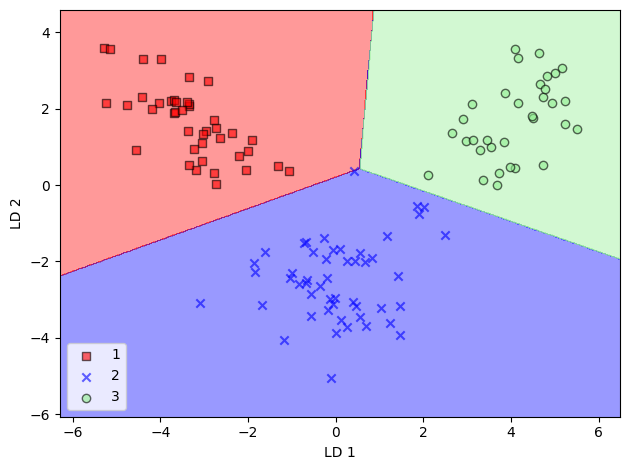

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [50]:
lr.score(lda.transform(X_test_std),y_test)

1.0

C:\Users\Shabnam\AppData\Local\Temp\ipykernel_14716\3615212090.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


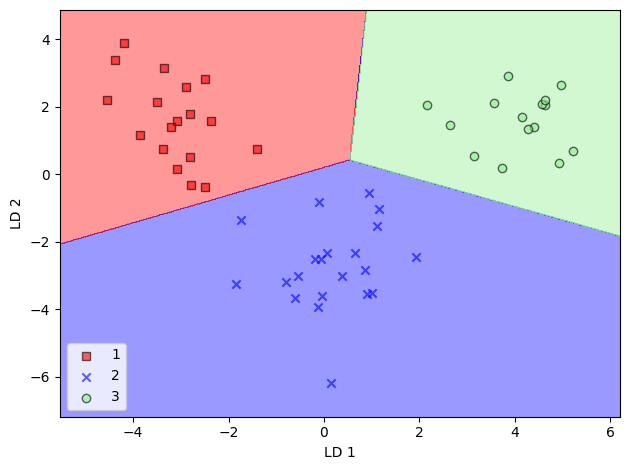

In [51]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()